# Importing Libararies


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Reading DataSet

In [2]:
df = pd.read_csv(r"C:\Users\sehri\Desktop\Machine Learning\diabetes.csv")
df.index = df.index + 1
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


# Replacing '0' with mode values

In [3]:
cols_to_fix = ['Glucose' , 'BloodPressure', 'SkinThickness', 'Insulin' , 'BMI']

for col in cols_to_fix:
    mode_value = df[col][df[col] != 0].mode()[0]
    df[col] = df[col].replace(0, mode_value)
    print(df.loc[df[col] == 0])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


# Checking for null vaues

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Checking for duplicated rows

In [5]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
764    False
765    False
766    False
767    False
768    False
Length: 768, dtype: bool

# REMOVING OUTLIERS

## By IQR method

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


no_outlier_data = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

## By Z_score method

In [7]:
from scipy import stats
import numpy as np

z_score = np.abs(stats.zscore(df))
no_outlier_data = df[(z_score < 2)].all(axis = 1)
no_outler_data = df

                          

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,105,33.6,0.627,50,1
2,1,85,66,29,105,26.6,0.351,31,0
3,8,183,64,32,105,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


# Feature Scaling



In [9]:
df = df.apply(pd.to_numeric, errors ='coerce') 


## Using MinMaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns = df.columns)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.109375,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.109375,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.271739,0.109375,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


## Using StandardScaling

In [11]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)
# df = pd.DataFrame(scaled_data, columns = df.columns)
# df.head(3)

# Feature Selection

## Using Correlation Matrix

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129186,0.208925,0.104428,0.005204,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129186,1.000000,0.220825,0.196269,0.413218,0.230762,0.138156,0.267969,0.491524
BloodPressure,0.208925,0.220825,1.000000,0.206391,0.029776,0.281276,-0.000478,0.326264,0.163875
SkinThickness,0.104428,0.196269,0.206391,1.000000,0.120690,0.522159,0.077395,0.158825,0.220678
Insulin,0.005204,0.413218,0.029776,0.120690,1.000000,0.186087,0.141959,0.070669,0.193850
BMI,0.021546,0.230762,0.281276,0.522159,0.186087,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.138156,-0.000478,0.077395,0.141959,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.267969,0.326264,0.158825,0.070669,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.491524,0.163875,0.220678,0.193850,0.312249,0.173844,0.238356,1.000000


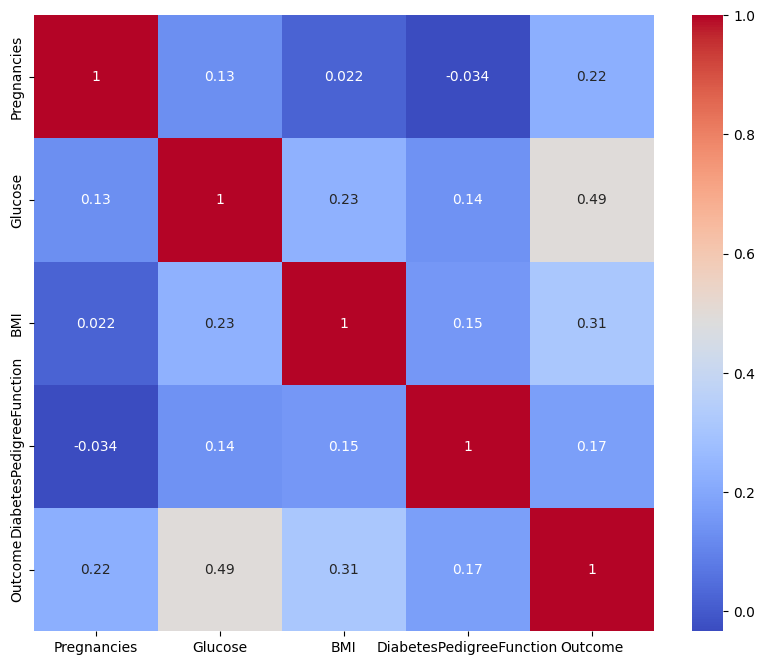

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Using chi_square method

## WRAPPER METHOD

### Forward Elimination


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

x = df.iloc[:,:-1]
y  = df['Outcome']


selector = SequentialFeatureSelector(LinearRegression(), direction = 'forward')
selected_data = selector.fit(x,y)
selected_data



SequentialFeatureSelector(estimator=LinearRegression())

In [14]:
selected_data.get_support()

array([ True,  True, False, False, False,  True,  True, False])

## Backward Elimination

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

x  = df.iloc[:,:-1]
y =df['Outcome']

selector = SequentialFeatureSelector(LinearRegression(), direction  = 'backward')
selected_data = selector.fit(x,y)
selected_data

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [16]:
selected_data.get_support()

array([ True,  True, False, False, False,  True,  True, False])

In [17]:
selected_features = ['Pregnancies','Glucose','BMI', 'DiabetesPedigreeFunction', 'Outcome']

df = df[selected_features]
df.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome
0,0.352941,0.670968,0.314928,0.234415,1.0
1,0.058824,0.264516,0.171779,0.116567,0.0
2,0.470588,0.896774,0.104294,0.253629,1.0
3,0.058824,0.290323,0.202454,0.038002,0.0
4,0.000000,0.600000,0.509202,0.943638,1.0


In [23]:
# new_data  = pd.DataFrame({'Pregnancies' : [2],
#                          'Glucose' : [0.4],
#                          'BMI' : [0.5],
#                          'DiabetesPedigreeFunction' : [0.44]
#                          })
# prd_new  = model.predict(new_data)
# prd_new


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

#  GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7662337662337663
